In [1]:
# Install dependencies if not already installed
!pip install scikit-learn tensorflow matplotlib seaborn pandas numpy

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nanditapore/medical-cost-dataset")

print("Path to dataset files:", path)

100%|██████████| 18.9k/18.9k [00:00<00:00, 9.00MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/nanditapore/medical-cost-dataset/versions/1


In [7]:
import os

# List all files in the downloaded dataset directory
path = "/root/.cache/kagglehub/datasets/nanditapore/medical-cost-dataset/versions/1"
print("Files in dataset directory:", os.listdir(path))


Files in dataset directory: ['medical_cost.csv']


In [9]:
import pandas as pd

# Correct file path
dataset_path = "/root/.cache/kagglehub/datasets/nanditapore/medical-cost-dataset/versions/1/medical_cost.csv"

# Load the dataset
df = pd.read_csv(dataset_path)

# Display first few rows
df.head()


,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520


```
Explore Data
```



In [10]:
# Basic info about the dataset
df.info()

# Display summary statistics of numerical columns
df.describe()

# Check for missing values
df.isnull().sum()

# Display column names
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


Index(['Id', 'age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

```
Data Cleaning & Preprocessing
```



In [11]:
# Drop rows with missing values (if any)
df = df.dropna()

# Verify missing values are gone
df.isnull().sum()

,0
Id,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [12]:
# Convert categorical variables into numerical (if applicable)
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Display first few rows after encoding
df.head()


,Id,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,1,19,27.900,0,16884.92400,False,True,False,False,True
1,2,18,33.770,1,1725.55230,True,False,False,True,False
2,3,28,33.000,3,4449.46200,True,False,False,True,False
3,4,33,22.705,0,21984.47061,True,False,True,False,False
4,5,32,28.880,0,3866.85520,True,False,True,False,False


```
Visualize Data
```



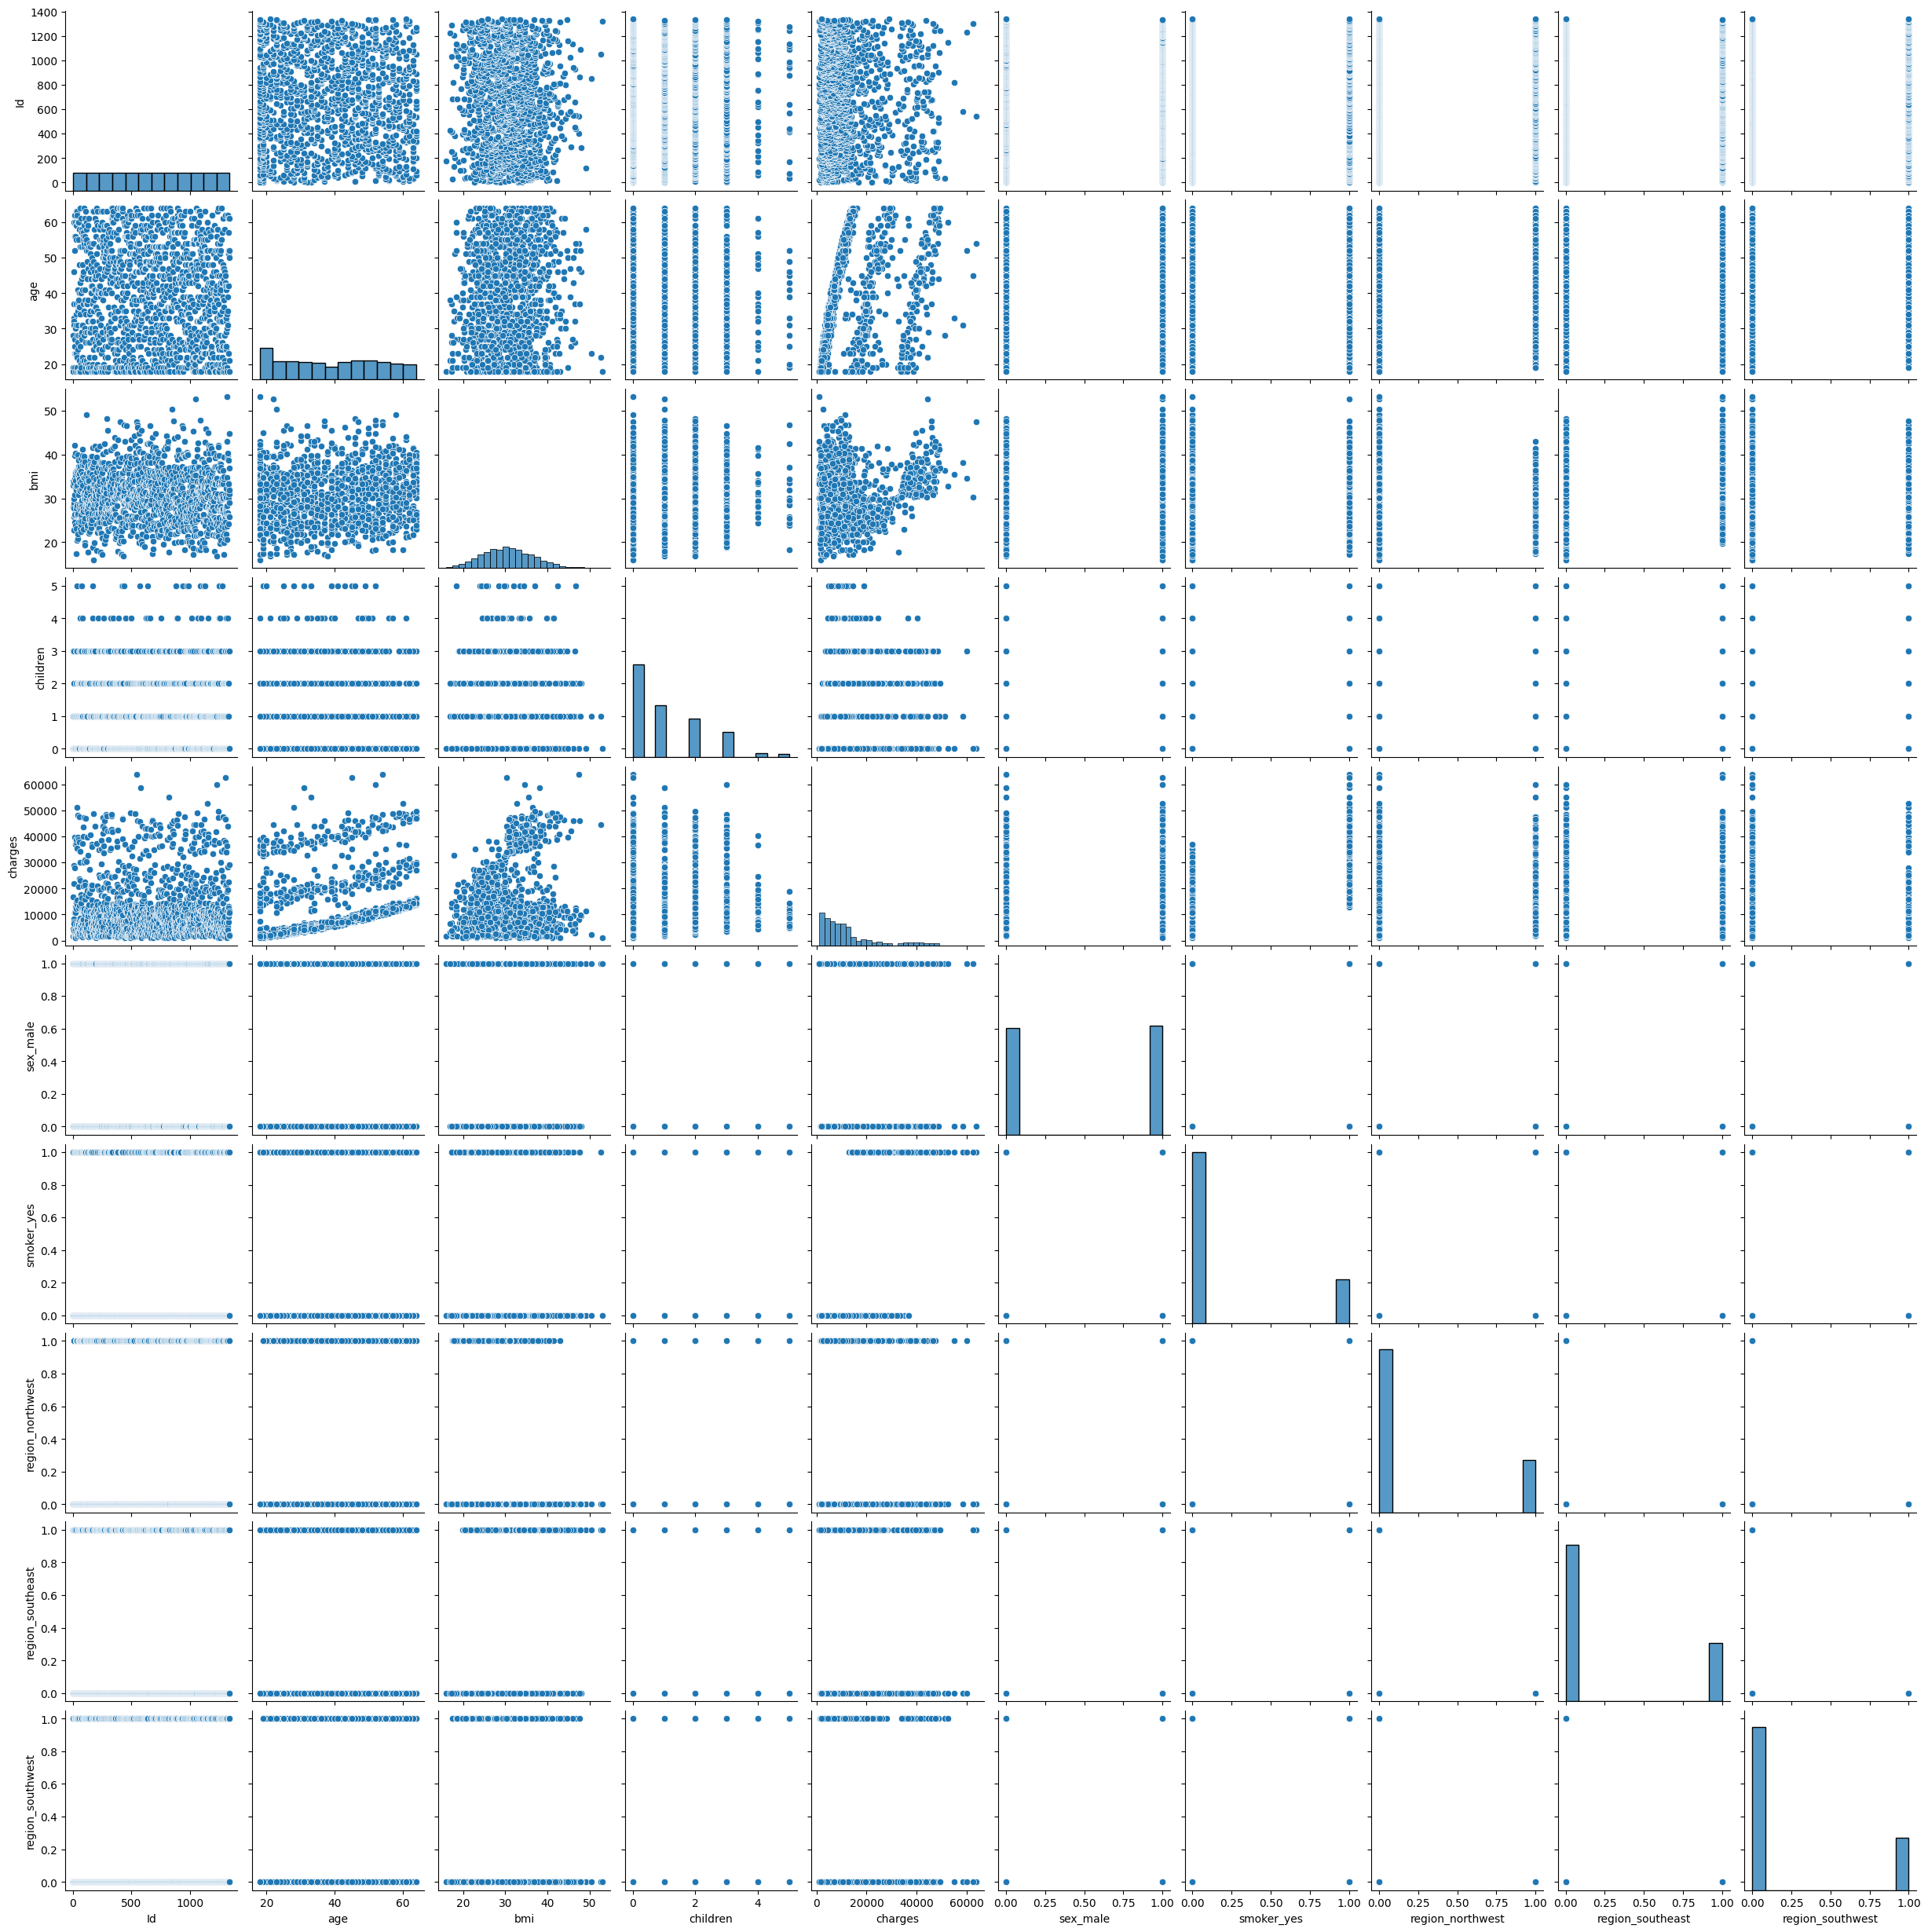

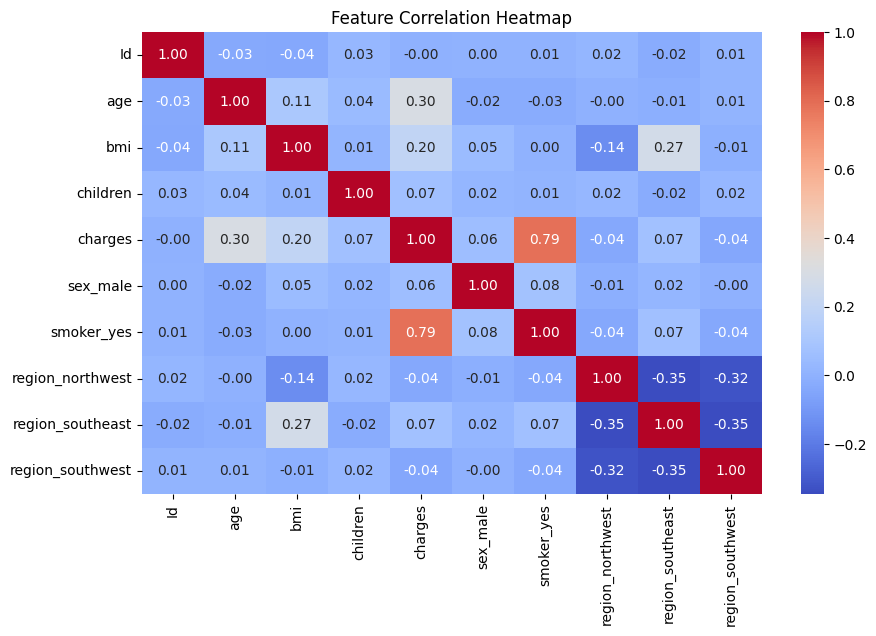

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot to see relationships between features
sns.pairplot(df)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()



```
Apply K-Means Clustering
```



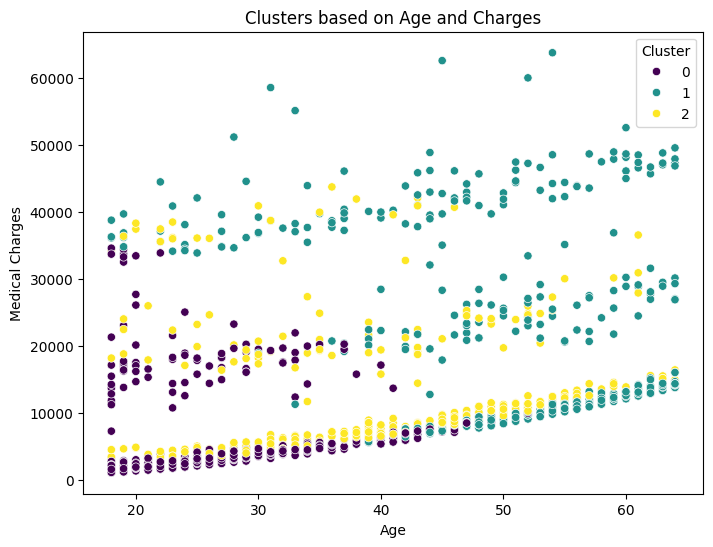

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select numerical features for clustering
features = ['age', 'bmi', 'children', 'charges']  # Adjust as needed

# Scale the data (K-Means works better with normalized data)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Apply K-Means Clustering with k=3 (you can experiment with different values)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['age'], y=df['charges'], hue=df['Cluster'], palette='viridis')
plt.title("Clusters based on Age and Charges")
plt.xlabel("Age")
plt.ylabel("Medical Charges")
plt.show()

```
Agglomerative Clustering
```



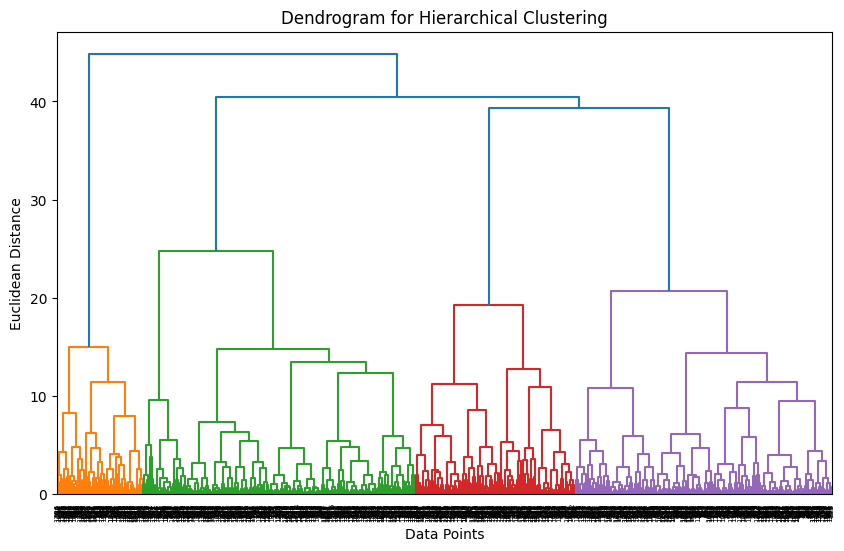

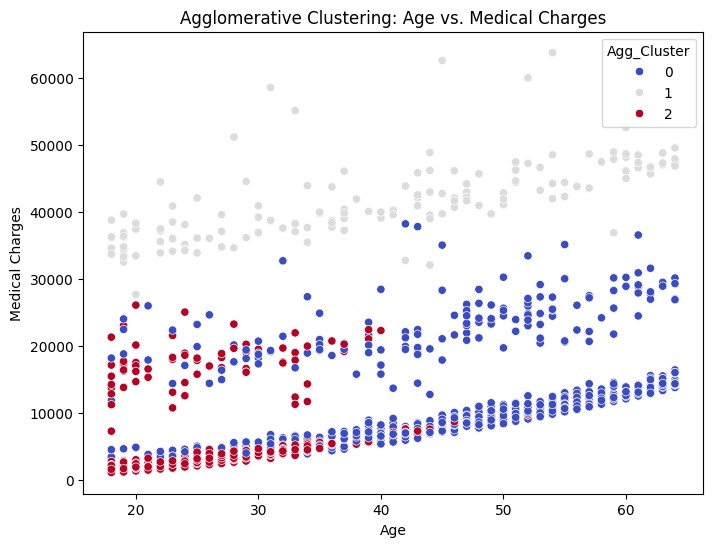

In [15]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Perform hierarchical clustering
plt.figure(figsize=(10,6))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

# Fit Agglomerative Clustering Model
agg_cluster = AgglomerativeClustering(n_clusters=3)  # Experiment with clusters
df['Agg_Cluster'] = agg_cluster.fit_predict(df_scaled)

# Visualize the Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['age'], y=df['charges'], hue=df['Agg_Cluster'], palette='coolwarm')
plt.title("Agglomerative Clustering: Age vs. Medical Charges")
plt.xlabel("Age")
plt.ylabel("Medical Charges")
plt.show()

```
Interpreting the Result
```



In [16]:
df.groupby('Cluster').mean()
df.groupby('Agg_Cluster').mean()

,Id,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,Cluster
Agg_Cluster,,,,,,,,,,,
0,660.063978,47.180807,29.965097,1.433936,12400.326039,0.496523,0.118220,0.258693,0.236439,0.254520,1.321280
1,669.181208,39.060403,35.403356,1.120805,41398.946587,0.644295,0.979866,0.161074,0.395973,0.234899,1.087248
2,684.036170,27.055319,30.228979,0.568085,5684.143674,0.474468,0.091489,0.244681,0.287234,0.227660,0.187234


```
Clustering Model Using TensorFlow
```



In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from sklearn.cluster import KMeans

# Define the number of clusters
num_clusters = 3

# Train K-Means in TensorFlow
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['TF_Cluster'] = kmeans.fit_predict(df_scaled)

# Display the first few rows with new cluster labels
df.head()

,Id,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,Cluster,Agg_Cluster,TF_Cluster
0,1,19,27.900,0,16884.92400,False,True,False,False,True,0,2,0
1,2,18,33.770,1,1725.55230,True,False,False,True,False,0,2,0
2,3,28,33.000,3,4449.46200,True,False,False,True,False,2,0,2
3,4,33,22.705,0,21984.47061,True,False,True,False,False,0,2,0
4,5,32,28.880,0,3866.85520,True,False,True,False,False,0,2,0
